<a href="https://colab.research.google.com/github/pranjal299/cv-project/blob/main/Smart_Pigs_Data_DL_Starter_6_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [1]:
!nvidia-smi

Tue Nov 15 15:44:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!gdown 1--iUzzvmYpINyr0zkB69xI4P9ZABM2A9
!gdown 1-17BDu_8mGJdvDQ8aUxDWjm0UpUaQJ-e 
!gdown 1-28nY4MxnpajMwKJgNDv596NfaML1TfU 
!gdown 1c3gl74SgqYeUZH0ExiucL1w0xeFvcyDU

Downloading...
From: https://drive.google.com/uc?id=1--iUzzvmYpINyr0zkB69xI4P9ZABM2A9
To: /content/X_test_pigs_combined_win_128_64_clean.csv
100% 387M/387M [00:04<00:00, 85.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-17BDu_8mGJdvDQ8aUxDWjm0UpUaQJ-e
To: /content/Y_train_pigs_win_128_64_clean.csv
100% 1.48M/1.48M [00:00<00:00, 192MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-28nY4MxnpajMwKJgNDv596NfaML1TfU
To: /content/Y_test_pigs_win_128_64_clean.csv
100% 492k/492k [00:00<00:00, 39.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c3gl74SgqYeUZH0ExiucL1w0xeFvcyDU
To: /content/X_train_pigs_combined_win_128_64_clean.csv
100% 1.16G/1.16G [00:11<00:00, 96.9MB/s]


In [3]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils import plot_model
import tensorflow as tf
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
from keras.models import load_model
import keras

In [4]:
def evaluate_model(trainX, trainy, testX, testy, epochs, batch_size, r):
  verbose, epochs, batch_size = 1, epochs, batch_size
  model = create_model(trainX, trainy)
  callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model_epochs_"+str(epochs)+"_batch_size_"+str(batch_size)+"_iteration_"+str(r)+".h5", save_best_only=True, monitor="val_accuracy", verbose = 1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy", factor=0.5, patience=20, min_lr=0.0001, verbose = 1
    ),
    keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=50, verbose=1),
  ]
  history = model.fit(trainX, trainy, validation_data = (testX,testy), epochs=epochs, batch_size=batch_size, verbose=verbose,callbacks=callbacks,)
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # evaluate model
  model = load_model("best_model_epochs_"+str(epochs)+"_batch_size_"+str(batch_size)+"_iteration_"+str(r)+".h5")
  _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy

In [32]:
def create_model(trainX, trainy):
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  model = Sequential()
  model.add(Conv1D(48, 3, activation='relu', input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Conv1D(48, 3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # visualize model
  model_plot(model)
  return model

In [27]:
def model_plot(model):
  tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
  img = cv2.imread('model.png')
  cv2_imshow(img)
  return model

In [28]:
# summarize scores
def summarize_results(scores):
  print(scores)
  m = max(scores)
  print('Best Accuracy: ',m,'%')

In [29]:
# run an experiment
def run_experiment(repeats,epochs,batch_size):
  # load data
  #trainX, trainy, testX, testy = load_dataset()
  trainX = X_train_i
  trainy = y_train
  testX = X_test_i
  testy = y_test
  # repeat experiment
  scores = list()
  for r in range(repeats):
    score = evaluate_model(trainX, trainy, testX, testy, epochs, batch_size, r)
    score = score * 100.0
    print('>#%d: %.3f' % (r+1, score))
    scores.append(score)
  # summarize results
  summarize_results(scores)

In [9]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

In [10]:
X_train = np.genfromtxt('X_train_pigs_combined_win_128_64_clean.csv', delimiter=',')
X_test = np.genfromtxt('X_test_pigs_combined_win_128_64_clean.csv', delimiter=',')
y_train = np.genfromtxt('Y_train_pigs_win_128_64_clean.csv', delimiter=',')
y_test = np.genfromtxt('Y_test_pigs_win_128_64_clean.csv', delimiter=',')

In [11]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

Copy from here onwards to decrease classes in dataset

In [12]:
y_train=y_train.astype(str)
y_test=y_test.astype(str)

In [13]:
y_train = np.char.replace(y_train, '10', 'Interacting With Each Other')
y_train = np.char.replace(y_train, '11', 'Laying')
y_train = np.char.replace(y_train, '0', 'Standing')
y_train = np.char.replace(y_train, '1', 'Running')
y_train = np.char.replace(y_train, '2', 'Eating')
y_train = np.char.replace(y_train, '3', 'Walking')
y_train = np.char.replace(y_train, '4', 'Food Fight')
y_train = np.char.replace(y_train, '5', 'Drinking')
y_train = np.char.replace(y_train, '6', 'Sitting')
y_train = np.char.replace(y_train, '7', 'Playing With Sensor')
y_train = np.char.replace(y_train, '8', 'Interacting With Toy')
y_train = np.char.replace(y_train, '9', 'Being Bothered')

y_test = np.char.replace(y_test, '10', 'Interacting With Each Other')
y_test = np.char.replace(y_test, '11', 'Laying')
y_test = np.char.replace(y_test, '0', 'Standing')
y_test = np.char.replace(y_test, '1', 'Running')
y_test = np.char.replace(y_test, '2', 'Eating')
y_test = np.char.replace(y_test, '3', 'Walking')
y_test = np.char.replace(y_test, '4', 'Food Fight')
y_test = np.char.replace(y_test, '5', 'Drinking')
y_test = np.char.replace(y_test, '6', 'Sitting')
y_test = np.char.replace(y_test, '7', 'Playing With Sensor')
y_test = np.char.replace(y_test, '8', 'Interacting With Toy')
y_test = np.char.replace(y_test, '9', 'Being Bothered')

In [14]:
X_train= X_train[(y_train=='Eating') | (y_train=='Laying') | (y_train=='Standing') | (y_train=='Walking') | (y_train=='Drinking') | (y_train=='Interacting With Each Other')]
X_test= X_test[(y_test=='Eating') | (y_test=='Laying') | (y_test=='Standing') | (y_test=='Walking') | (y_test=='Drinking') | (y_test=='Interacting With Each Other')]

In [15]:
y_train = y_train[(y_train=='Eating') | (y_train=='Laying') | (y_train=='Standing') | (y_train=='Walking') | (y_train=='Drinking') | (y_train=='Interacting With Each Other')]
y_test = y_test[(y_test=='Eating') | (y_test=='Laying') | (y_test=='Standing') | (y_test=='Walking') | (y_test=='Drinking') | (y_test=='Interacting With Each Other')]

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55665, 768)
(18383, 768)
(55665,)
(18383,)


In [17]:
y_train = np.char.replace(y_train, 'Standing','0')
y_train = np.char.replace(y_train, 'Walking','1')
y_train = np.char.replace(y_train, 'Eating','2')
y_train = np.char.replace(y_train, 'Interacting With Each Other','3')
y_train = np.char.replace(y_train, 'Laying','4')
y_train = np.char.replace(y_train, 'Drinking','5')

In [18]:
y_test = np.char.replace(y_test, 'Standing','0')
y_test = np.char.replace(y_test, 'Walking','1')
y_test = np.char.replace(y_test, 'Eating','2')
y_test = np.char.replace(y_test, 'Interacting With Each Other','3')
y_test = np.char.replace(y_test, 'Laying','4')
y_test = np.char.replace(y_test, 'Drinking','5')

In [19]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

Copy till above cell for decreasing classes

In [20]:
y_train = y_train.reshape((len(y_train),1))
y_test = y_test.reshape((len(y_test),1))

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
X_train_i = np.zeros((X_train.shape[0],int(X_train.shape[1]/6),6),dtype=float)

In [23]:
X_test_i = np.zeros((X_test.shape[0],int(X_test.shape[1]/6),6),dtype=float)

In [24]:
for i in range(6):
  X_train_i[:,:,i]=X_train[:,i*128:(i+1)*128]
  X_test_i[:,:,i]=X_test[:,i*128:(i+1)*128]

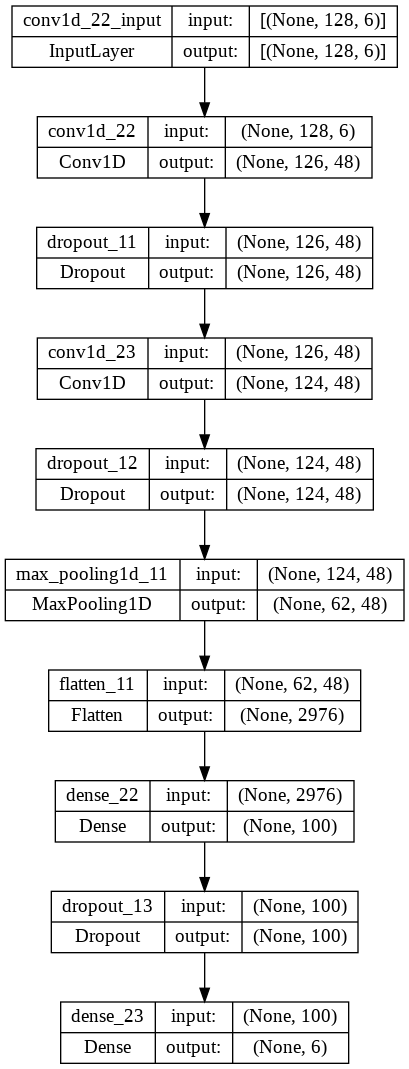

Epoch 1/1000
435/435 [==============================] - ETA: 0s - loss: 1.8678 - accuracy: 0.6006
Epoch 1: val_accuracy improved from -inf to 0.68558, saving model to best_model_epochs_1000_batch_size_128_iteration_0.h5
435/435 [==============================] - 4s 6ms/step - loss: 1.8678 - accuracy: 0.6006 - val_loss: 1.1970 - val_accuracy: 0.6856 - lr: 0.0010
Epoch 2/1000
435/435 [==============================] - ETA: 0s - loss: 1.1491 - accuracy: 0.6658
Epoch 2: val_accuracy improved from 0.68558 to 0.68683, saving model to best_model_epochs_1000_batch_size_128_iteration_0.h5
435/435 [==============================] - 2s 5ms/step - loss: 1.1491 - accuracy: 0.6658 - val_loss: 1.0698 - val_accuracy: 0.6868 - lr: 0.0010
Epoch 3/1000
425/435 [============================>.] - ETA: 0s - loss: 1.0499 - accuracy: 0.6766
Epoch 3: val_accuracy improved from 0.68683 to 0.68743, saving model to best_model_epochs_1000_batch_size_128_iteration_0.h5
435/435 [==============================] - 2s 

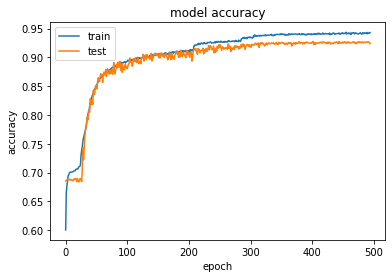

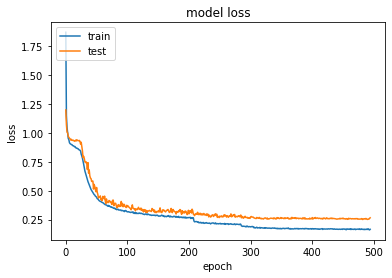

>#1: 92.770


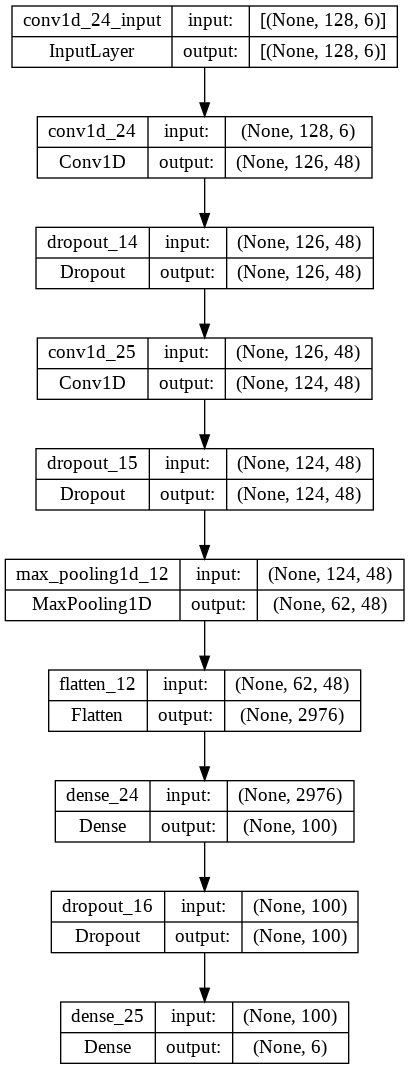

Epoch 1/1000
429/435 [============================>.] - ETA: 0s - loss: 2.0787 - accuracy: 0.4940
Epoch 1: val_accuracy improved from -inf to 0.68063, saving model to best_model_epochs_1000_batch_size_128_iteration_1.h5
435/435 [==============================] - 3s 6ms/step - loss: 2.0680 - accuracy: 0.4959 - val_loss: 1.2654 - val_accuracy: 0.6806 - lr: 0.0010
Epoch 2/1000
430/435 [============================>.] - ETA: 0s - loss: 1.2143 - accuracy: 0.6369
Epoch 2: val_accuracy improved from 0.68063 to 0.68406, saving model to best_model_epochs_1000_batch_size_128_iteration_1.h5
435/435 [==============================] - 2s 6ms/step - loss: 1.2127 - accuracy: 0.6374 - val_loss: 1.1093 - val_accuracy: 0.6841 - lr: 0.0010
Epoch 3/1000
426/435 [============================>.] - ETA: 0s - loss: 1.0469 - accuracy: 0.6851
Epoch 3: val_accuracy improved from 0.68406 to 0.68460, saving model to best_model_epochs_1000_batch_size_128_iteration_1.h5
435/435 [==============================] - 2s 

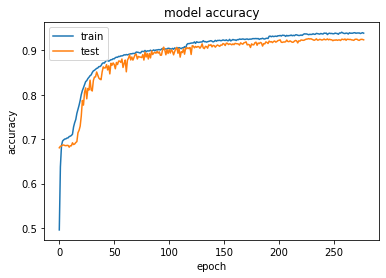

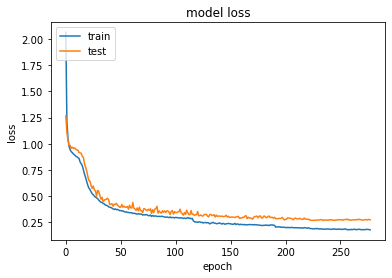

>#2: 92.618


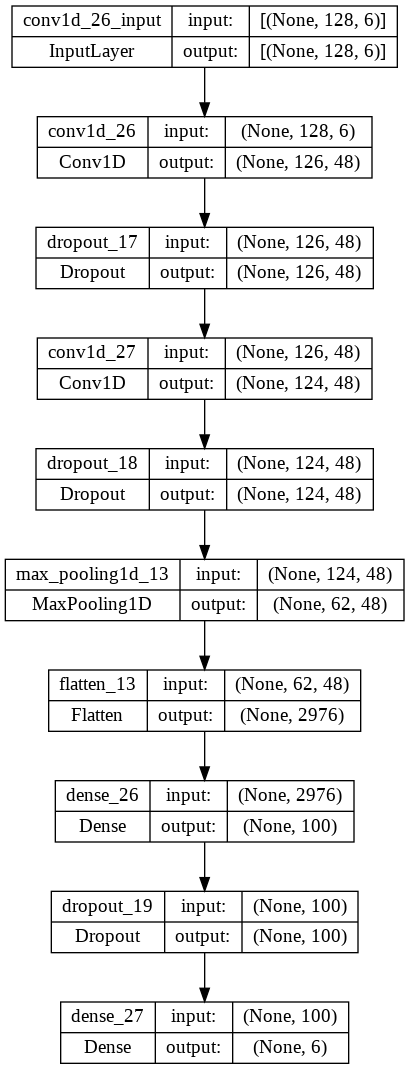

Epoch 1/1000
434/435 [============================>.] - ETA: 0s - loss: 1.8924 - accuracy: 0.5836
Epoch 1: val_accuracy improved from -inf to 0.65055, saving model to best_model_epochs_1000_batch_size_128_iteration_2.h5
435/435 [==============================] - 4s 7ms/step - loss: 1.8913 - accuracy: 0.5836 - val_loss: 1.2731 - val_accuracy: 0.6505 - lr: 0.0010
Epoch 2/1000
432/435 [============================>.] - ETA: 0s - loss: 1.1362 - accuracy: 0.6779
Epoch 2: val_accuracy improved from 0.65055 to 0.68873, saving model to best_model_epochs_1000_batch_size_128_iteration_2.h5
435/435 [==============================] - 3s 6ms/step - loss: 1.1356 - accuracy: 0.6780 - val_loss: 1.0824 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 3/1000
432/435 [============================>.] - ETA: 0s - loss: 1.0262 - accuracy: 0.6898
Epoch 3: val_accuracy did not improve from 0.68873
435/435 [==============================] - 3s 6ms/step - loss: 1.0262 - accuracy: 0.6897 - val_loss: 1.0063 - val_accura

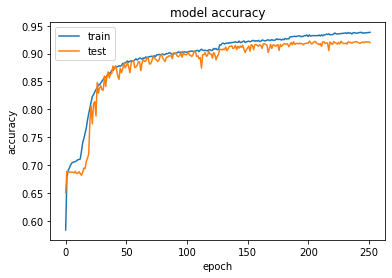

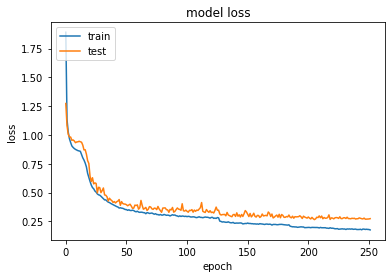

>#3: 92.259


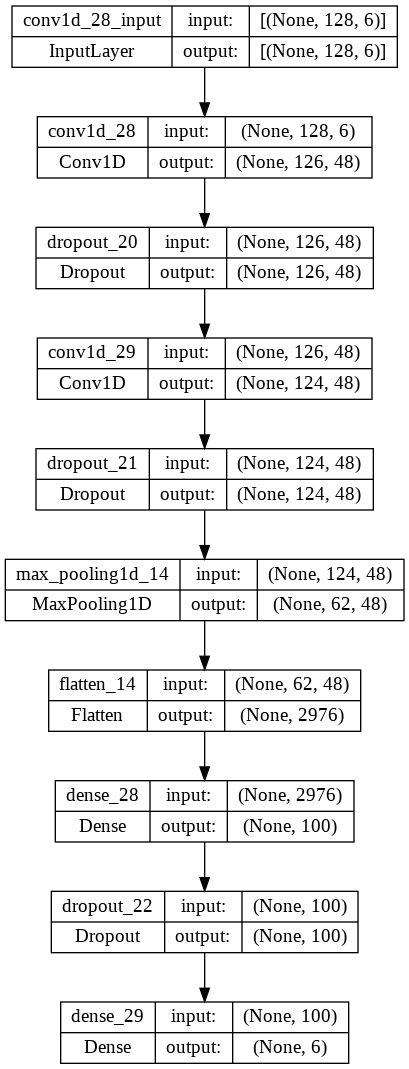

Epoch 1/1000
427/435 [============================>.] - ETA: 0s - loss: 1.9864 - accuracy: 0.4763
Epoch 1: val_accuracy improved from -inf to 0.64342, saving model to best_model_epochs_1000_batch_size_128_iteration_3.h5
435/435 [==============================] - 4s 8ms/step - loss: 1.9744 - accuracy: 0.4770 - val_loss: 1.2099 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 2/1000
435/435 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.5617
Epoch 2: val_accuracy improved from 0.64342 to 0.68775, saving model to best_model_epochs_1000_batch_size_128_iteration_3.h5
435/435 [==============================] - 3s 7ms/step - loss: 1.2156 - accuracy: 0.5617 - val_loss: 0.9826 - val_accuracy: 0.6878 - lr: 0.0010
Epoch 3/1000
426/435 [============================>.] - ETA: 0s - loss: 1.0706 - accuracy: 0.6441
Epoch 3: val_accuracy improved from 0.68775 to 0.68781, saving model to best_model_epochs_1000_batch_size_128_iteration_3.h5
435/435 [==============================] - 3s 

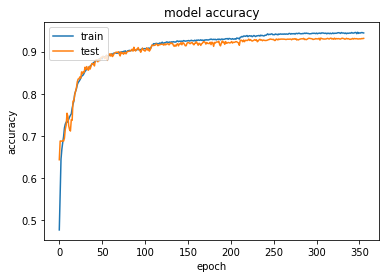

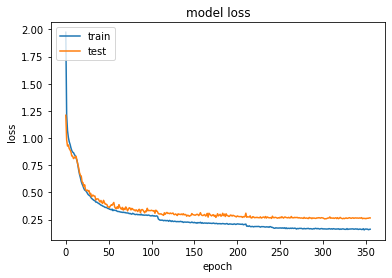

>#4: 93.184


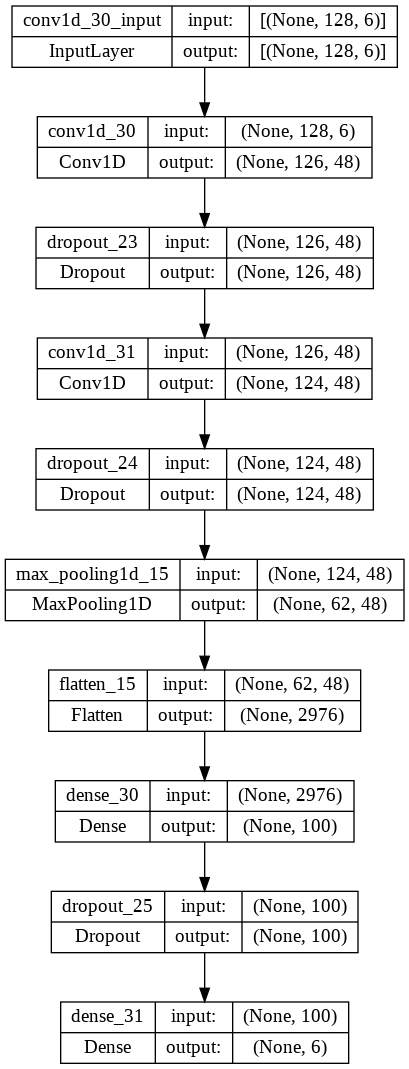

Epoch 1/1000
433/435 [============================>.] - ETA: 0s - loss: 2.2125 - accuracy: 0.5060
Epoch 1: val_accuracy improved from -inf to 0.63782, saving model to best_model_epochs_1000_batch_size_128_iteration_4.h5
435/435 [==============================] - 4s 8ms/step - loss: 2.2087 - accuracy: 0.5062 - val_loss: 1.3271 - val_accuracy: 0.6378 - lr: 0.0010
Epoch 2/1000
428/435 [============================>.] - ETA: 0s - loss: 1.2434 - accuracy: 0.6240
Epoch 2: val_accuracy improved from 0.63782 to 0.68498, saving model to best_model_epochs_1000_batch_size_128_iteration_4.h5
435/435 [==============================] - 3s 6ms/step - loss: 1.2407 - accuracy: 0.6252 - val_loss: 1.0985 - val_accuracy: 0.6850 - lr: 0.0010
Epoch 3/1000
434/435 [============================>.] - ETA: 0s - loss: 1.0511 - accuracy: 0.6862
Epoch 3: val_accuracy improved from 0.68498 to 0.68672, saving model to best_model_epochs_1000_batch_size_128_iteration_4.h5
435/435 [==============================] - 3s 

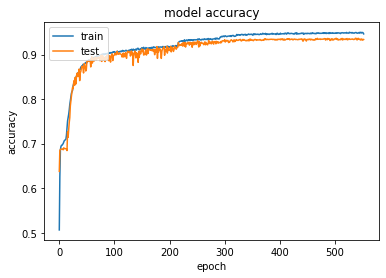

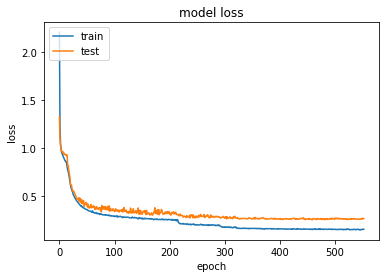

>#5: 93.684
[92.7704930305481, 92.61817932128906, 92.2591507434845, 93.18392276763916, 93.68438124656677]
Best Accuracy:  93.68438124656677 %


In [33]:
run_experiment(repeats = 5,epochs = 1000,batch_size = 128) #1000 epochs